In [5]:
import numpy as np
import matplotlib.pyplot as plt

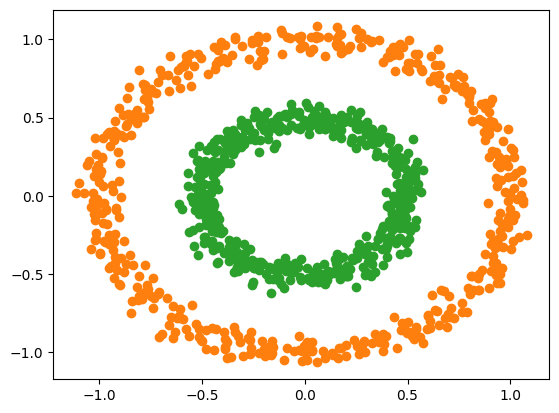

(1000,)


In [70]:
t = np.linspace(-5, 5, 500)
x1 = np.sin(np.pi*t) + np.random.normal(0, 0.05, 500)
y1 = np.cos(np.pi*t) + np.random.normal(0, 0.05, 500)
plt.scatter(x1, y1, s = 10)

x2 = 0.5*np.sin(np.pi*t) + np.random.normal(0, 0.05, 500)
y2 = 0.5*np.cos(np.pi*t) + np.random.normal(0, 0.05, 500)


D1 = np.concatenate((x1.reshape((500,1)), y1.reshape(500,1)), axis=1)
D2 = np.concatenate((x2.reshape((500,1)), y2.reshape(500,1)), axis=1)
plt.scatter(D1[:, 0], D1[:, 1])
plt.scatter(D2[:, 0], D2[:, 1])
plt.show()

X = np.concatenate((D1, D2), axis=0)
Y = np.ones(np.size(X,0))
Y[500:] = -1

In [44]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))
  

In [45]:
class Network(object):
  def __init__(self, sizes):
    self.num_layers = len(sizes)
    self.sizes = sizes
    self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
    self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]
  
  def feedForward(self, a):
    for w, b in zip(self.weights, self.biases):
      a = sigmoid(np.dot(w, a) + b)
    return a

  def gradientDescent(self, x, y, epochs, eta):
    n = len(x)
    for e in range(epochs):
      self.updateBatch(x, y, eta)
    print("Epoch {} complete".format(e))

  def updateBatch(self, X, Y, eta):
    change_weights = [np.zeros(w.shape) for w in self.weights]
    change_biases = [np.zeros(b.shape) for b in self.biases]
    for x, y in zip(X,Y):
      delta_biases, delta_weights = self.backprop(x, y)
      change_biases = [cb + db for cb, db in zip(change_biases, delta_biases)]
      change_weights = [cw + dw for cw,dw in zip(change_weights, delta_weights)]

    self.weights = [w - eta * (cw/len(X)) for w, cw in zip(self.weights, change_weights)]
    self.biases = [b - eta * (cb/len(X)) for b, cb in zip(self.biases, change_biases)]
    
  def backprop(self, x, y):
    change_biases = [np.zeros(b.shape) for b in self.biases]
    change_weighs = [np.zeros(w.shape) for w in self.weights]

    activation = x # input layer activation
    activations = [x] 
    zs = []
    for b, w in zip(self.biases, self.weights):
      z = np.dot(w, activation) + b
      zs.append(z)
      activation = sigmoid(z)
      activations.append(activation)

    error = np.multiply(self.cost_derivative(activations[-1], y), sigmoid_derivative(zs[-1]))
    change_biases[-1] = error
    change_weighs = np.dot(error, activations[-2].T)

    for l in range(2, self.num_layers):
      z = zs[-l]
      sder = sigmoid_derivative(z)
      error = np.dot(self.weights[-l+1].T, error) * sder
      change_biases[-l] = error
      change_weighs[-l] = np.dot(error, activations[-l-1].T)

    return (change_biases, change_weighs)

  
  def cost_derivative(self, a, y):
    return (a - y)

  def evaluate(self, x, y):
    y_predicted = [np.argmax(self.feedForward(x_), y_) for x_, y_ in zip(x,y)]

  

In [46]:
net = Network([2, 3, 1])

In [50]:
X = np.empty((1000, 2))
X[:500, 0] = x1
X[:500, 1] = y1
X[500:, 0] = x2
X[500:, 1] = y2
Y = np.empty(1000)
Y[:500] = 1
Y[500:] = -1

In [52]:
net.gradientDescent(X, Y, 10, 0.01) 

ValueError: shapes (3,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)